# Chapter3 線形回帰モデル

回帰の目的は、連続する目的変数tの値を、D次元の入力変数ベクトルxの値に基づいて予測することである。

線形回帰モデルは調整可能なパラメータの線形関数であり、最も単純な形式では入力変数の線形関数でもある。しかし、非線形の基底関数を用いることで、より多様なクラスの関数を得ることができる。

N個の観測値と対応する目的値が与えられた場合、新しい入力$x$に対応する$t$の値を予測することが目的である。最も単純な方法では、新しい入力$x$に対応する$t$の値の予測として機能する適切な関数$y(x)$を直接構築することができる。さらに一般的には、条件付き分布$p(t∣x)$をモデル化し、適切に選ばれた損失関数の期待値を最小化する方法で$t$の予測を行う。実数値変数の損失関数としてよく使用されるのが二乗損失で、その最適解は$t$の条件付き期待値で与えられる。

## 3.1 線形基底関数モデル

最も単純な線形回帰モデルは
$$
y(\mathbf{x}, \mathbf{w}) = w_0 + w_1x_1 + ... + w_Dx_D
$$
に関するものである。これは単に**線形回帰**と呼ばれる。

これは表現能力が乏しくすぎるため、非線形な関数の線形結合を考える。
$$
y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=0}^{M-1}{w_j\phi{(\mathbf{x})}}
$$

$\phi{(\mathbf{x})}$を**基底関数**と呼ぶ。

パラメータ$w_0$はデータの任意の固定されたオフセット量を許容するものであり、**バイアスパラメータ**と呼ばれることがある。

Chapter1で説明した多項式基底関数の制限の一つは、入力変数のグローバル関数であるため、入力空間の一部の変更が他のすべての部分に影響を与えることである。これは、入力空間を領域に分割し、各領域で異なる多項式を適合させることで解決でき、**スプライン関数**と呼ぶ。

基底関数にはほかにもたくさんの選択肢があり、ガウス基底関数や、シグモイド基底関数などが挙げられる。どちらもパラメータ$w_j$がかかっているため正規化する必要はない。

$$
\phi_j{(x)} = 
\exp{\left\{ -\frac{(x-\mu_j)^2}{2\sigma^2} \right\}}\\
$$

$$
\phi_j{(x)} = 
\sigma{\left( \frac{x-\mu_j}{s} \right)}\\
\sigma{(a)} = 
\frac{1}{1 + \exp(-a)}
$$

以降の事項は基本的に基底関数の選択に依存しない。

### 3.1.1 最尤推定と最小二乗法

目的変数tが線形回帰モデルに以下で表される精度$\beta$のガウスノイズがかかっているとすると

$$
\epsilon = N(\epsilon | 0, \beta^{-1})\\
t = y(\mathbf{x}, \mathbf{w}) + \epsilon
$$

このとき、tは平均$y(\mathbf{x}, \mathbf{w})$、精度$\beta$のガウス分布で表すことができる。

$$
p(t|\mathbf{x}, \mathbf{w}, \beta) = 
N(t|y(\mathbf{x}, \mathbf{w}), \beta^{-1}) = 
N(t | \mathbf{w}^T \phi{(\mathbf{x})}, \beta^{-1})
$$

次に独立に生成された、N個の入力値と目的値について考えると、尤度関数は
$$
p(\mathbf{t} | \mathbf{X}, \mathbf{w}, \beta) = 
\prod_{n=1}^N{N(t_n|\mathbf{w}^T\phi{(\mathbf{x}_n)}, \beta^{-1})}
$$

以降、$\mathbf{x}$は条件としてしか現れないため、省略する。

尤度関数の対数を取ると、
$$
\ln p(\mathbf{t}|\mathbf{w}, \beta) = 
\sum_{n=1}^{N} \ln N(t_n | \mathbf{w}^T\phi{(x_n)}, \beta^{-1}) = 
\frac{N}{2}\ln {\beta} - \frac{N}{2}\ln {2\pi} - \beta E_D(\mathbf{w})
$$

最後の項は二乗和誤差である。
$$
E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N} {\left\{ t_n - \mathbf{w}^T\phi{\left(x_n\right)} \right\}^2}
$$

最尤推定によって$\mathbf{w}$と$\beta$を決定する。\
まずは$\mathbf{w}$に関して解いた結果は、
$$
\mathbf{w}_{ML} = \left(\Phi^T \Phi \right)^{-1} \Phi^T \mathbf{t}\\
\Phi_{nj} = \phi_j{(x_n)}
$$

$\Phi$は**計画行列**と呼ばれる。

また、$\beta$に関して解いた結果は、

$$
\frac{1}{\beta_{ML}} = \frac{1}{N} \sum_{n=1}^{N} {\left\{ t_n - \mathbf{w_{ML}}^T\phi{\left(x_n\right)} \right\}^2}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 真の関数
def true_function(x):
    return 2 * np.cos(2 * np.pi * x) ** 2 - 1 + 4 * x ** 2 - 2 * x ** 3

In [ ]:
# データ生成
np.random.seed(0)
n_samples = 101
x_vals = np.linspace(0, 1, num=n_samples)
beta_true = 3.0
sigma_true = np.sqrt(1 / beta_true)
print(sigma_true)

In [ ]:
y_true_vals = true_function(x_vals)
print(y_true_vals[:5])

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle='--') # 真のノイズ範囲
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('true function', fontsize=20)
plt.title('$\\beta=' + str(beta_true) + '$', loc='left')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# データ数を指定
N = 100

# データを生成
x_n = np.random.uniform(low=np.min(x_vals), high=np.max(x_vals), size=N)
t_n = true_function(x_n) + np.random.normal(loc=0.0, scale=sigma_true, size=N)

In [ ]:
# 観測データの散布図を作成
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle='--') # 真のノイズ範囲
plt.scatter(x_n, t_n, color='orange') # 観測データ
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('true function + noise', fontsize=20)
plt.title('$N=' + str(N) + ', \\beta=' + str(beta_true) + '$', loc='left')
plt.grid()
plt.legend()
plt.show()

In [ ]:
class Polynomial(object):
    def __init__(self, M) -> None:
        self.M = M
        self.coef_ = np.zeros(M)
        self.beta_ = 0


    # 多項式基底関数を作成
    def phi_polynomial(self, x, j):
        return x**j


    # 多項式基底関数の計画行列を作成:(M > 2)
    def cal_design_matrix(self, x):

        design_matrix = np.ones((len(x), self.M))
        # 列ごとに多項式基底関数による変換
        for m in range(1, self.M):
            design_matrix[:, m] = self.phi_polynomial(x, m)
        return design_matrix
    
    
    def fit(self, x, t, regularization=None, lam=None):
        if regularization == None:
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        if regularization == "Ridge":
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(lam * np.identity(self.M) + np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        
    def predict(self, x):
        self.design_matrix_predict = self.cal_design_matrix(x)
        return np.dot(self.design_matrix_predict , self.coef_.reshape(-1, 1)).flatten()

In [ ]:
# 基底関数の数を指定
M = 7

# 基底関数を指定
phi = Polynomial(M=M)

phi.fit(x=x_n, t=t_n)
print(phi.coef_)
print(phi.beta_)

In [ ]:
# 回帰曲線を計算
y_ml_vals = phi.predict(x_vals)

In [ ]:
# 回帰曲線を作図
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle=':') # 真のノイズ範囲
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$') # 推定したモデル
plt.fill_between(x=x_vals, y1=y_ml_vals-2.0*1/np.sqrt(phi.beta_), y2=y_ml_vals+2.0*1/np.sqrt(phi.beta_), 
                 color='blue', alpha=0.2, linestyle=':') # 推定したノイズ範囲
plt.scatter(x_n, t_n, color='orange') # 観測データ
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Linear Basis Function Model : Polynomial', fontsize=20)
plt.title('$N=' + str(N) + ', M=' + str(M) + 
          ', w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')' + 
          ', \\beta=' + str(np.round(phi.beta_, 2)) + '$', loc='left')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 重み付き基底関数を作図
plt.figure(figsize=(12, 8))
for m in range(M):
    plt.plot(x_vals, phi.coef_[m] * phi.design_matrix_predict[:, m], 
             linestyle='--', label='$w_' + str(m) + '\phi_' + str(m) + '(x)$') # 重み付き基底関数
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$')
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Polynomial Basis Function', fontsize=20)
plt.title('w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')', loc='left')
plt.legend()
plt.grid()
plt.ylim(-5, 5)
plt.show()

In [ ]:
class GaussianBasis(object):
    def __init__(self, M=6, s=1.0) -> None:
        self.M = M
        self.s = s
        self.coef_ = np.zeros(M)
        self.beta_ = 0


    # ガウス基底関数を作成
    def phi_gauss(self, x, mu, s):
        return np.exp(-0.5 * (x - mu)**2 / s**2)


    # ガウス基底関数の計画行列を作成:(M > 2)
    def cal_design_matrix(self, x):
        # パラメータ設定用の入力値を設定
        
        _x_n = x.copy()
        s = np.std(_x_n)  # 標準偏差で固定

        if self.M == 2:
            mu_m = np.array([np.mean(_x_n)])
        elif self.M == 3:
            sgm = s * 1.0
            mu_m = np.array([np.mean(_x_n) - sgm, np.mean(_x_n) + sgm])
        else:
            sgm = s * 0.25
            mu_m = np.linspace(np.min(_x_n) + sgm, np.max(_x_n) - sgm, num=self.M - 1)

        # 変数を初期化
        design_matrix = np.ones((len(x), self.M))

        # 列ごとにガウス基底関数による変換
        for m in range(1, self.M):
            design_matrix[:, m] = self.phi_gauss(x, mu_m[m - 1], s)

        return design_matrix
    
    
    def fit(self, x, t, regularization=None, lam=None):
        if regularization == None:
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        if regularization == "Ridge":
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(lam * np.identity(self.M) + np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
    def predict(self, x):
        self.design_matrix_predict = self.cal_design_matrix(x)
        return np.dot(self.design_matrix_predict , self.coef_.reshape(-1, 1)).flatten()


In [ ]:
# 基底関数の数を指定
M = 6

# 基底関数を指定
phi = GaussianBasis(M=M)

phi.fit(x=x_n, t=t_n)
print(phi.coef_)
print(phi.beta_)

In [ ]:
# 回帰曲線を計算
y_ml_vals = phi.predict(x_vals)

In [ ]:
# 回帰曲線を作図
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle=':') # 真のノイズ範囲
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$') # 推定したモデル
plt.fill_between(x=x_vals, y1=y_ml_vals-2.0*1/np.sqrt(phi.beta_), y2=y_ml_vals+2.0*1/np.sqrt(phi.beta_), 
                 color='blue', alpha=0.2, linestyle=':') # 推定したノイズ範囲
plt.scatter(x_n, t_n, color='orange') # 観測データ
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Linear Basis Function Model : Gaussian', fontsize=20)
plt.title('$N=' + str(N) + ', M=' + str(M) + 
         ', w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')' + 
          ', \\beta=' + str(np.round(phi.beta_, 2)) + '$', loc='left')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 重み付き基底関数を作図
plt.figure(figsize=(12, 8))
for m in range(M):
    plt.plot(x_vals, phi.coef_[m] * phi.design_matrix_predict[:, m], 
             linestyle='--', label='$w_' + str(m) + '\phi_' + str(m) + '(x)$') # 重み付き基底関数
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$')
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Gaussian Basis Function', fontsize=20)
plt.title('w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')', loc='left')
plt.legend()
plt.grid()
plt.ylim(np.min(phi.coef_), np.max(phi.coef_))
plt.show()

In [ ]:
class SigmoidBasis(object):
    def __init__(self, M=6, s=1.0) -> None:
        self.M = M
        self.s = s
        self.coef_ = np.zeros(M)
        self.beta_ = 0


    # ロジスティックシグモイド関数を作成
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))


    # シグモイド基底関数を作成
    def phi_sigmoid(self, x, mu, s):
        a_n = (x - mu) / s
        return self.sigmoid(a_n)


    # ガウス基底関数の計画行列を作成:(M > 2)
    def cal_design_matrix(self, x):
        # パラメータ設定用の入力値を設定
        
        _x_n = x.copy()
        s = np.std(_x_n)  # 標準偏差で固定

        if self.M == 2:
            mu_m = np.array([np.mean(_x_n)])
        elif self.M == 3:
            sgm = s * 1.0
            mu_m = np.array([np.mean(_x_n) - sgm, np.mean(_x_n) + sgm])
        else:
            sgm = s * 0.25
            mu_m = np.linspace(np.min(_x_n) + sgm, np.max(_x_n) - sgm, num=self.M - 1)

        # 変数を初期化
        design_matrix = np.ones((len(x), self.M))

        # 列ごとにガウス基底関数による変換
        for m in range(1, self.M):
            design_matrix[:, m] = self.phi_sigmoid(x, mu_m[m - 1], s)

        return design_matrix
    
    
    def fit(self, x, t, regularization=None, lam=None):
        if regularization == None:
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        if regularization == "Ridge":
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(lam * np.identity(self.M) + np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        
    def predict(self, x):
        self.design_matrix_predict = self.cal_design_matrix(x)
        return np.dot(self.design_matrix_predict , self.coef_.reshape(-1, 1)).flatten()

In [ ]:
# 基底関数を指定
M=6
phi = SigmoidBasis(M)

phi.fit(x=x_n, t=t_n)
print(phi.coef_)
print(phi.beta_)

In [ ]:
# 回帰曲線を計算
y_ml_vals = phi.predict(x_vals)

In [ ]:
# 回帰曲線を作図
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle=':') # 真のノイズ範囲
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$') # 推定したモデル
plt.fill_between(x=x_vals, y1=y_ml_vals-2.0*1/np.sqrt(phi.beta_), y2=y_ml_vals+2.0*1/np.sqrt(phi.beta_), 
                 color='blue', alpha=0.2, linestyle=':') # 推定したノイズ範囲
plt.scatter(x_n, t_n, color='orange') # 観測データ
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Linear Basis Function Model : Sigmoid', fontsize=20)
plt.title('$N=' + str(N) + ', M=' + str(M) + 
          ', w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')' + 
          ', \\beta=' + str(np.round(phi.beta_, 2)) + '$', loc='left')
plt.legend()
plt.grid()
plt.show()

### 

In [ ]:
# 重み付き基底関数を作図
plt.figure(figsize=(12, 8))
for m in range(M):
    plt.plot(x_vals, phi.coef_[m] * phi.design_matrix_predict[:, m], 
             linestyle='--', label='$w_' + str(m) + '\phi_' + str(m) + '(x)$') # 重み付き基底関数
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$')
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Sigmoid Basis Function', fontsize=20)
plt.title('w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')', loc='left')
plt.legend()
plt.grid()
plt.ylim(-5.1, 5.1)
plt.show()

In [ ]:
class FourierBasis(object):
    def __init__(self, M=3, freq=2*3.14) -> None:
        self.M = M
        self.freq = freq
        self.coef_ = np.zeros(2 * M + 1)
        self.beta_ = 0

    # フーリエ基底関数を作成
    def phi_fourier(self, x, j):
        if j == 0:
            return 1
        elif j % 2 == 0:
            return np.cos(j//2 * x * self.freq)
        else:
            return np.sin((j//2 + 1) * x * self.freq)

    # フーリエ基底関数の計画行列を作成(M > 3)
    def cal_design_matrix(self, x):
        design_matrix = np.ones((len(x), 2 * self.M + 1))
        # 列ごとにフーリエ基底関数による変換
        for m in range(1, 2 * self.M + 1):
            design_matrix[:, m] = self.phi_fourier(x, m)
        return design_matrix

    def fit(self, x, t, regularization=None, lam=None):
        if regularization == None:
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))
        
        if regularization == "Ridge":
            # 重みパラメータの最尤解を計算
            self.design_matrix_fit = self.cal_design_matrix(x)
            self.coef_ = np.linalg.inv(lam * np.identity(2*self.M+1) + np.dot(self.design_matrix_fit.T, self.design_matrix_fit)).dot(self.design_matrix_fit.T).dot(t.reshape(-1, 1)).flatten()
            self.beta_ = 1 / (np.sum((t - np.dot(self.design_matrix_fit, self.coef_.reshape(-1, 1)).flatten())**2) / len(x))

    def predict(self, x):
        self.design_matrix_predict = self.cal_design_matrix(x)
        return np.dot(self.design_matrix_predict, self.coef_.reshape(-1, 1)).flatten()


In [ ]:
# 基底関数を指定
M=3
phi = FourierBasis(M=3)

phi.fit(x=x_n, t=t_n, regularization="Ridge", lam=0.001)
print(phi.coef_)
print(phi.beta_)
print(phi.design_matrix_fit.shape)

In [ ]:
# 回帰曲線を計算
y_ml_vals = phi.predict(x_vals)

In [ ]:
# 回帰曲線を作図
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true_vals, color='darkturquoise', label='true model') # 真のモデル
plt.fill_between(x=x_vals, y1=y_true_vals-2.0*sigma_true, y2=y_true_vals+2.0*sigma_true, 
                 color='darkturquoise', alpha=0.2, linestyle=':') # 真のノイズ範囲
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$') # 推定したモデル
plt.fill_between(x=x_vals, y1=y_ml_vals-2.0*1/np.sqrt(phi.beta_), y2=y_ml_vals+2.0*1/np.sqrt(phi.beta_), 
                 color='blue', alpha=0.2, linestyle=':') # 推定したノイズ範囲
plt.scatter(x_n, t_n, color='orange') # 観測データ
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Linear Basis Function Model : Fourier', fontsize=20)
plt.title('$N=' + str(N) + ', M=' + str(M) + 
          ', w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')' + 
          ', \\beta=' + str(np.round(phi.beta_, 2)) + '$', loc='left')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(phi.coef_)

In [ ]:
# 重み付き基底関数を作図
plt.figure(figsize=(12, 8))
for m in range(2*M+1):
    plt.plot(x_vals, phi.coef_[m] * phi.design_matrix_predict[:, m], 
             linestyle='--', label='$w_' + str(m) + '\phi_' + str(m) + '(x)$') # 重み付き基底関数
plt.plot(x_vals, y_ml_vals, color='blue', label='$w^T \phi(x)$')
plt.xlabel('x')
plt.ylabel('t')
plt.suptitle('Fourier Basis Function', fontsize=20)
plt.title('w=(' + ', '.join([str(w) for w in np.round(phi.coef_, 2)]) + ')', loc='left')
plt.legend()
plt.grid()
plt.ylim(-5, 5)
plt.show()

### 3.1.4 正則化ニ乗法

過学習を防ぐために誤差関数に正則化項を加える。
$$
E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})
$$

$\lambda$はデータに依存する誤差$E_D(\mathbf{w})$と正則化項$E_W(\mathbf{w})$の相対的な重要度を制御する正則化係数である。

$$
E_W(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T\mathbf{w}
$$

誤差全体は
$$
\frac{1}{2}\sum_{n=1}^{N} {\left\{ t_n - \mathbf{w}^T \phi{(x_n)} \right\} ^ 2} + \frac{\lambda}{2} \mathbf{w}^T\mathbf{w}
$$

この正則化項の選び方は機械学習の分野では特に、**荷重減衰**と呼ぶ。上記の正則化項を使った回帰を**リッジ回帰**という。\
最尤推定解は
$$
\mathbf{w}_{ML} = \left( \lambda \mathbf{I} + \Phi^T \Phi \right)^{-1} \Phi^T \mathbf{t}
$$

## 3.2 バイアス-バリアンス

限られたサイズの訓練データ集合を用いて複雑なモデルを学習するとき、過学習を避けるために基底関数の数を限定するとモデルの表現力が下がる。過学習と学習不足のバランスを取る問題として考える。\
バイアス-バリアンスのトレードオフとして知られるモデルの複雑さについて考える。
- バイアス：予測の平均が真の関数からどれくらい離れているか（線形モデルなどのシンプルなモデルは真の関数の複雑さを捉えるのが難しいためバイアスが高くなる。）
- バリアンス：予測モデルが訓練データのランダムなノイズにどれだけ敏感化をはかる。（高次多項式モデルなどの複雑なモデルではバリアンスが高くなる。）
- ノイズ：理想値と実データがどれくらい離れているか

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# 画像ファイルを読み込む
image = mpimg.imread('bias-variance_tradeoff.gif')

# 画像を表示する
plt.imshow(image)
plt.show()

## 3.3 ベイズ線形回帰

線形回帰モデルをベイズ的に取り扱うことにし、最尤推定の過学習を回避するとともに訓練データだけからモデルの複雑さを自動的に決定する。

### 3.3.1 パラメータの分布

まずは、モデルパラメータ$\mathbf{w}$の事前確率分布を導入する。\
当面は、ノイズの精度パラメータ$\beta$は既知であるとする。\
3.1.1で尤度関数が$\mathbf{w}$の2次関数の指数であることに注目すると、共役事前分布が期待値$m_0$、共分散$S_0$を持つガウス分布
$$
p(\mathbf{w}) = N(\mathbf{w} | \mathbf{m}_0, \mathbf{S}_0)
$$
で表される。\
事後分布は
$$
p(\mathbf{w} | \mathbf{t}) = N(\mathbf{w} | \mathbf{m}_N, \mathbf{S}_N)
$$
で表される。

$$
\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \beta \boldsymbol{\Phi^T\Phi}\\
\mathbf{m}_N = \mathbf{S}_N \left( \mathbf{S}_0^{-1} \mathbf{m}_0 + \beta \boldsymbol{\Phi^T \mathbf{t}} \right) 
$$
事後分布はガウス分布であるため、モードは期待値と一致する。したがって、事後確率を最大にする重みベクトルは単純に$\mathbf{w}_{MAP} = \mathbf{m}_N$で与えられる。\
以降、単一の精度パラメータ$\alpha$と期待値が0の等方的ガウス分布
$$
p(\mathbf{w} | \alpha) = N(\mathbf{w} | \mathbf{0}, \alpha^{-1}\mathbf{I})
$$
を考える。\
このとき、対応する$\mathbf{w}$の事後分布は以下で与えられる。

$$
\mathbf{S}_N^{-1} = \alpha\mathbf{I} + \beta \boldsymbol{\Phi^T\Phi}\\
\mathbf{m}_N = \beta \mathbf{S}_N \boldsymbol{\Phi^T \mathbf{t}}
$$

事後分布の対数は、対数尤度と事前分布の対数の和で与えられる。\
したがって、この事後分布を$\mathbf{w}$について最大化することは、リッジ回帰の和を最小化することと等価である。


ここからは
- 1次元の入力変数$x$と、1次元の目標変数$t$を考える。
- $y(x, w) = w_0 + w_1x$の線形モデルにあてはめを行なう。
- モデルのパラメータ2つの分布は、2変量ガウス分布とする。
- ノイズはガウスノイズとする。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
# ベイズ的単回帰
class BayesianLinearRegression(object):
    def __init__(self, alpha=1.0, beta=1.0, m0=[0, 0]):
        self.alpha = alpha
        self.beta = beta
        self.m0 = m0
        self.I = np.identity(2)
        self.s0 = self.alpha * self.I
        self.train_x = []
        self.train_t = []

    def design_matrix(self, x):
        return np.array([[1, xi] for xi in x])

    def calc_mn(self, x, t):
        Phi = self.design_matrix(x)
        Sn = self.calc_Sn(x)
        return self.beta * Sn.dot(Phi.T).dot(t)

    def calc_Sn(self, x):
        Phi = self.design_matrix(x)
        return np.linalg.inv(self.alpha * self.I + self.beta * Phi.T.dot(Phi))


    # 対数尤度の分布をプロット
    def plot_likelihood(self, t, x, title='', ax=None):
        w0 = np.linspace(-1, 1, 100)
        w1 = np.linspace(-1, 1, 100)
        W0, W1 = np.meshgrid(w0, w1)
        L = []

            # 1点の対数尤度を計算
        def calc_likelihood(t, x, w):
            w = np.array(w)
            phi_x = np.array([1, x])
            return -1 * self.beta / 2 * (t - w.T.dot(phi_x)) ** 2
        
        for w0i in w0:
            L.append([calc_likelihood(t, x, [w0i, w1i]) for w1i in w1])

        ax.pcolor(W0, W1, np.array(L).T, cmap=plt.cm.jet, vmax=0, vmin=-1)
        ax.set_xlabel('$w_0$')
        ax.set_ylabel('$w_1$')
        ax.set_title(title)

    # 確率分布をプロット
    def plot_probability(self, mean=[0, 0], cov=None, title='', ax=None):
        if cov is None:
            cov = self.I
        w0 = np.linspace(-1, 1, 100)
        w1 = np.linspace(-1, 1, 100)
        W0, W1 = np.meshgrid(w0, w1)
        P = []
        for w0i in w0:
            P.append([scipy.stats.multivariate_normal.pdf([w0i,w1i], mean, cov) for w1i in w1])
        
        ax.pcolor(W0, W1, np.array(P).T, cmap=plt.cm.jet)
        ax.set_xlabel('$w_0$')
        ax.set_ylabel('$w_1$')
        ax.set_title(title)

    def plot_lines(self, mean, cov, ax):
        
        def plot_result_line(w, ax):
            x = np.linspace(-1, 1, 100)
            y = w[0] + x * w[1]
            ax.plot(x, y)

        for i in range(6):
            plot_result_line(np.random.multivariate_normal(mean, cov), ax)

        for x, t in zip(self.train_x, self.train_t):
            ax.plot(x, t, 'ro')

        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

    def uniform_sample(self):
        return (np.random.random() - 0.5) * 2

    def create_train_data(self):
        def f(x, a):
            return a[0] + a[1] * x + np.random.normal(0, 0.2)

        x = self.uniform_sample()
        t = f(x, [-0.3, 0.5])
        return x, t

    def update(self):
        x, t = self.create_train_data()
        self.train_x.append(x)
        self.train_t.append(t)
        self.mn = self.calc_mn(x=self.train_x, t=self.train_t)
        self.sn = self.calc_Sn(x=self.train_x)
        return self.mn, self.sn
    
    def predict(self, x_list):
        mn = self.calc_mn(self.train_x, self.train_t)
        sn = self.calc_Sn(self.train_x)
        means = []
        variances = []
        for x in x_list:
            Phi_x = self.design_matrix([x])
            mean = mn.T.dot(Phi_x.T)
            variance = 1 / self.beta + Phi_x.dot(sn).dot(Phi_x.T)
            means.append(mean.flatten())
            variances.append(variance.flatten())
        return np.array(means), np.array(variances)

事前分布
$$
p(\mathbf{w} | \alpha) = N(\mathbf{w} | \mathbf{0}, \alpha^{-1}\mathbf{I})
$$

In [ ]:
# 初期状態
ALPHA = 2.0
SIGMA = 0.2
BETA = 1 / SIGMA**2

model = BayesianLinearRegression(alpha=ALPHA, beta=BETA)

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(11, 3))
plt.subplots_adjust(wspace=0.4)
model.plot_probability(mean=model.m0, cov=model.s0, ax=axis[1])
model.plot_lines(model.m0, model.s0, ax=axis[2])
plt.show()

データ取得（1点）

In [ ]:
model.update()

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(11, 3))
plt.subplots_adjust(wspace=0.4)
model.plot_likelihood(t=model.train_t[-1], x=model.train_x[-1], ax=axis[0])
model.plot_probability(mean=model.mn, cov=model.sn, ax=axis[1])
model.plot_lines(model.mn, model.sn, ax=axis[2])

In [ ]:
x_test = np.linspace(-1, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

In [ ]:
plt.scatter(x_test, y_test, s=10, marker="$○$")
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.2)

データ取得（2点）

In [ ]:
model.update()

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(11, 3))
plt.subplots_adjust(wspace=0.4)
model.plot_likelihood(t=model.train_t[-1], x=model.train_x[-1], ax=axis[0])
model.plot_probability(mean=model.mn, cov=model.sn, ax=axis[1])
model.plot_lines(model.mn, model.sn, ax=axis[2])

データ取得（いっぱい）

In [ ]:
for i in range(18):    
    model.update()

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(11, 3))
plt.subplots_adjust(wspace=0.4)
model.plot_likelihood(t=model.train_t[-1], x=model.train_x[-1], ax=axis[0])
model.plot_probability(mean=model.mn, cov=model.sn, ax=axis[1])
model.plot_lines(model.mn, model.sn, ax=axis[2])

In [ ]:
x_test = np.linspace(-1, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

In [ ]:
plt.scatter(x_test, y_test, s=10, marker="$○$")
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.2)

In [1067]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

$$
y = \sum_{j=0}^{M-1} w_j\phi_j(x)
$$

In [1068]:
# ベイズ的単回帰
class BayesianGausiaanBasisLinearRegression(object):
    def __init__(self, alpha=1.0, beta=1.0, M=12, sigma=0.1):
        
        # 事前分布と尤度に関するパラメータ
        self.alpha = alpha
        self.beta = beta

        # ガウス基底関数のパラメータ
        self.M = M
        self.mu = np.linspace(0, 1.1, M-1)
        self.sigma = sigma

        # 尤度に関するパラメータ
        self.m0 = np.zeros(self.M)
        self.I = np.eye(self.M)
        self.s0 = self.alpha * self.I

        # 生成されるデータ点の格納
        self.train_x = []
        self.train_t = []

    def gaussian_basis_function(self, x):
        return np.append(1, np.exp(-(x - self.mu)**2/(2*self.sigma **2)))

    def design_matrix(self, x):
        Phi = np.array([self.gaussian_basis_function(xi) for xi in x])
        return Phi

    def calc_mn(self, x, t):
        Phi = self.design_matrix(x)
        Sn = self.calc_Sn(x)
        return self.beta * Sn.dot(Phi.T).dot(t)

    def calc_Sn(self, x):
        Phi = self.design_matrix(x)

        return np.linalg.inv(self.alpha * self.I + self.beta * Phi.T.dot(Phi))


    def plot_lines(self, mean, cov, ax):
        x_vals = np.linspace(0, 1, 100)
        for i in range(5):
            w = np.random.multivariate_normal(mean, cov)
            y_vals = [sum(w * self.gaussian_basis_function(xi)) for xi in x_vals]
            ax.plot(x_vals, y_vals, linewidth=1, linestyle="--", c="black")

        for x, t in zip(self.train_x, self.train_t):
            ax.scatter(x, t, marker="$○$", color="black", s=50)
        ax.plot(x_vals, self.f(x_vals), c="red", linewidth=1)

        ax.set_xlim(0, 1.1)
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')


    def uniform_sample(self):
        return (np.random.random())

    def f(self, x):
        return np.cos(2*np.pi*x) + x ** 2
    
    def f_noise(self, x):
        return self.f(x)+ np.random.normal(0, 0.1)

    def create_train_data(self):
        x = self.uniform_sample()
        t = self.f_noise(x)
        return x, t

    def update(self):
        x, t = self.create_train_data()
        self.train_x.append(x)
        self.train_t.append(t)
        self.mn = self.calc_mn(x=self.train_x, t=self.train_t)
        self.sn = self.calc_Sn(x=self.train_x)
    
    def predict(self, x_list):
        mn = self.calc_mn(self.train_x, self.train_t)
        sn = self.calc_Sn(self.train_x)
        means = []
        variances = []
        for x in x_list:
            Phi_x = self.design_matrix([x])
            mean = mn.T.dot(Phi_x.T)
            variance = 1 / self.beta + Phi_x.dot(sn).dot(Phi_x.T)
            means.append(mean.flatten())
            variances.append(variance.flatten())
        return np.array(means), np.array(variances)

    

In [1069]:
# 初期状態
ALPHA = 1.0
BETA = 9
M = 12

model = BayesianGausiaanBasisLinearRegression(alpha=ALPHA, beta=BETA, M=M)

In [1070]:
model.update()

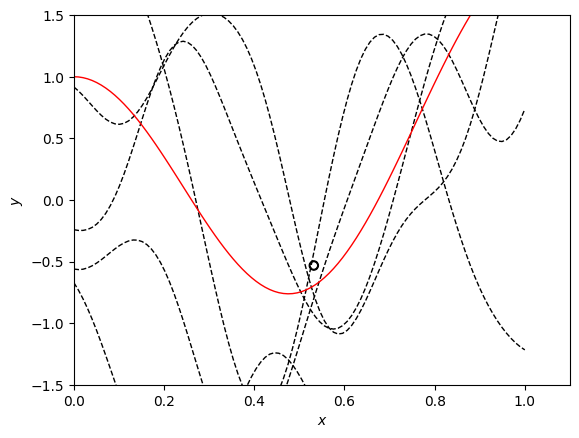

In [1071]:
ax = plt.subplot()
model.plot_lines(mean=model.mn, cov=model.sn, ax=ax)

In [1072]:
x_test = np.linspace(0, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

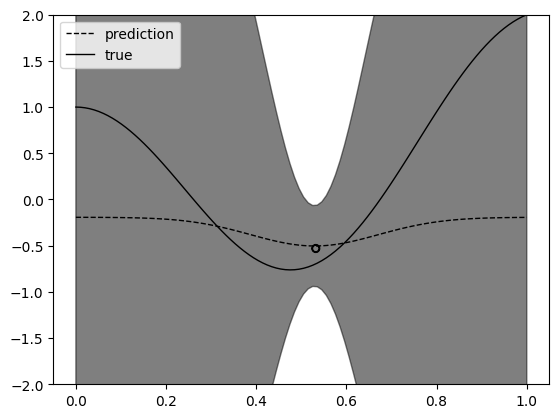

In [1073]:
plt.plot(x_test, y_test, c="black", linestyle="--", linewidth=1, label="prediction")
plt.plot(x_test, model.f(x_test), c="black", linewidth=1, label="true")
plt.scatter(model.train_x, model.train_t, marker="$○$", color="black")
# plt.plot(x_test, y_test - 2 * var, c="b")
# plt.plot(x_test, y_test + 2 * var, c="b")
plt.ylim(-2, 2)
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.5, color="black")
plt.legend()

In [1074]:
model.update()

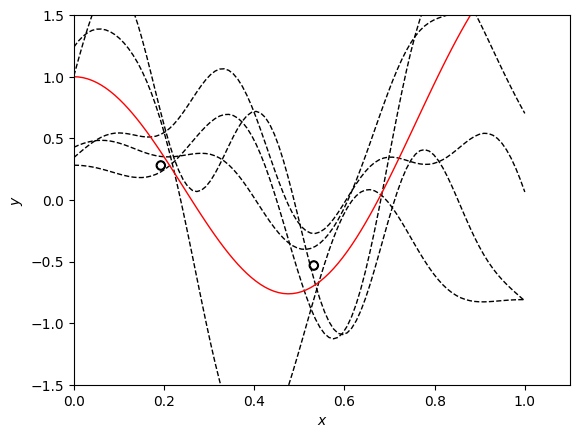

In [1075]:
ax = plt.subplot()
model.plot_lines(mean=model.mn, cov=model.sn, ax=ax)

In [1076]:
x_test = np.linspace(0, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

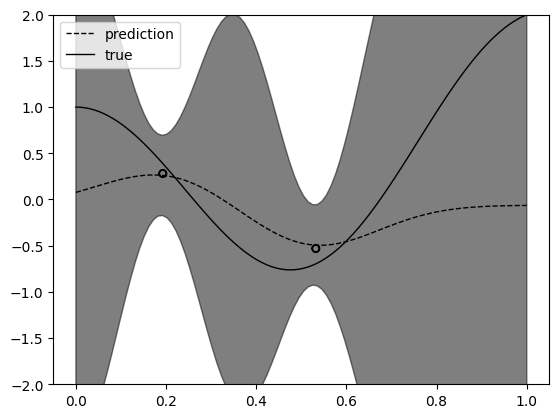

In [1077]:
plt.plot(x_test, y_test, c="black", linestyle="--", linewidth=1, label="prediction")
plt.plot(x_test, model.f(x_test), c="black", linewidth=1, label="true")
plt.scatter(model.train_x, model.train_t, marker="$○$", color="black")
# plt.plot(x_test, y_test - 2 * var, c="b")
# plt.plot(x_test, y_test + 2 * var, c="b")
plt.ylim(-2, 2)
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.5, color="black")
plt.legend()

In [1078]:
for i in range(2):
    model.update()

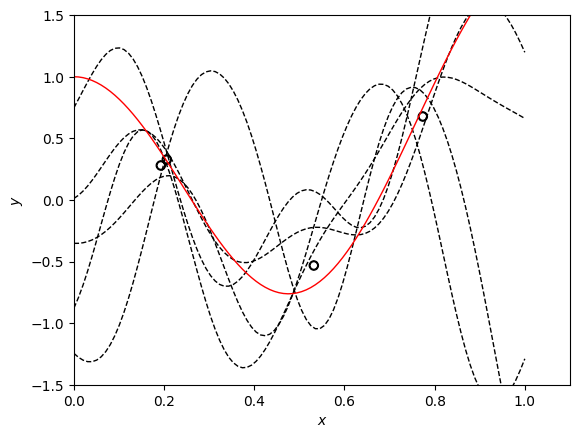

In [1079]:
ax = plt.subplot()
model.plot_lines(mean=model.mn, cov=model.sn, ax=ax)

In [1080]:
x_test = np.linspace(0, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

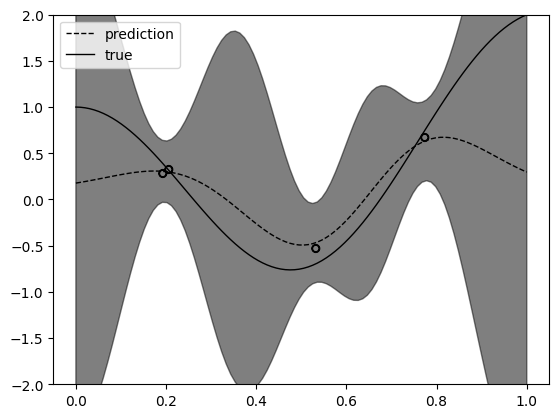

In [1081]:
plt.plot(x_test, y_test, c="black", linestyle="--", linewidth=1, label="prediction")
plt.plot(x_test, model.f(x_test), c="black", linewidth=1, label="true")
plt.scatter(model.train_x, model.train_t, marker="$○$", color="black")
# plt.plot(x_test, y_test - 2 * var, c="b")
# plt.plot(x_test, y_test + 2 * var, c="b")
plt.ylim(-2, 2)
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.5, color="black")
plt.legend()

In [1082]:
for i in range(16):
    model.update()

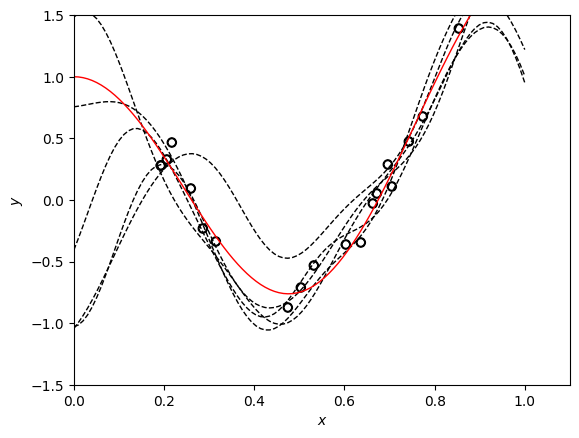

In [1083]:
ax = plt.subplot()
model.plot_lines(mean=model.mn, cov=model.sn, ax=ax)

In [1084]:
x_test = np.linspace(0, 1, 100).flatten()
y_test, var = model.predict(x_list=x_test)
y_test = y_test.flatten()
var = var.flatten()

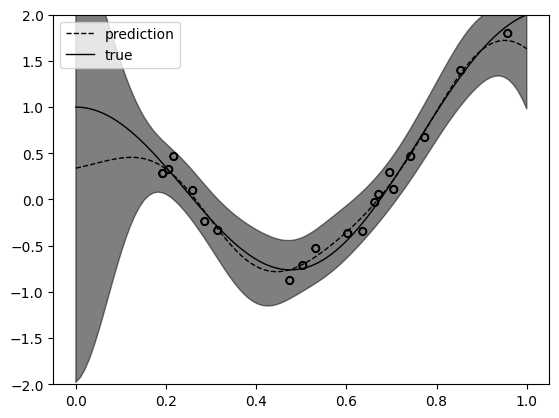

In [1085]:
plt.plot(x_test, y_test, c="black", linestyle="--", linewidth=1, label="prediction")
plt.plot(x_test, model.f(x_test), c="black", linewidth=1, label="true")
plt.scatter(model.train_x, model.train_t, marker="$○$", color="black")
# plt.plot(x_test, y_test - 2 * var, c="b")
# plt.plot(x_test, y_test + 2 * var, c="b")
plt.ylim(-2, 2)
plt.fill_between(x_test, y1 = y_test - 2 * var, y2 = y_test + 2 * var, alpha=0.5, color="black")
plt.legend()

### 3.3.5 エビデンス近似

In [1106]:
import numpy as np
from scipy.stats import norm

In [1211]:
class PolynomialFeatures(object):

    def __init__(self, degree):
        assert type(degree) is int, "%s is not int" % type(degree)
        self.degree = degree

    def transform(self, x):
        features = [x ** i for i in range(self.degree + 1)]
        return np.array(features).transpose()
    

class BayesianRegression(object):

    def __init__(self, alpha=1., beta=1.):
        self.alpha = alpha
        self.beta = beta

    def fit(self, X, t):
        self.sn = np.linalg.inv(
            self.alpha * np.identity(np.size(X, 1))
            + self.beta * X.T.dot(X))
        self.mn = self.beta * self.sn.dot(X.T.dot(t))

    def predict(self, X):
        return X.dot(self.mn)

    def predict_dist(self, X):
        y = X.dot(self.mn)
        y_var = 1 / self.beta + np.sum(X.dot(self.sn) * X, axis=1)
        y_std = np.sqrt(y_var)
        return y, y_std
    


class EvidenceApproximation(BayesianRegression):

    def __init__(self, iter_max=100, alpha=1., beta=1.):
        self.iter_max = iter_max
        self.alpha = alpha
        self.beta = beta

    def fit(self, X, t):
        M = X.T.dot(X)
        eigenvalues = np.linalg.eigvalsh(M)
        for i in range(self.iter_max):
            params = [self.alpha, self.beta]
            super(EvidenceApproximation, self).fit(X, t)
            self.gamma = np.sum(self.beta * eigenvalues / (self.alpha + self.beta * eigenvalues))
            self.alpha = self.gamma / self.mn.dot(self.mn)
            self.beta = (len(t) - self.gamma) / np.sum((t - X.dot(self.mn)) ** 2)
            if np.allclose(params, [self.alpha, self.beta]):
                break
        super(EvidenceApproximation, self).fit(X, t)

    def evidence(self, X, t):
        M = X.T.dot(X)
        return (len(M) * np.log(self.alpha)
                + len(t) * np.log(self.beta)
                - self.beta * np.sum((t - X.dot(self.mn)) ** 2)
                - np.linalg.slogdet(self.alpha + self.beta * M)[1])


def create_toy_data(func, low=0, high=1, size=10, sigma=1.):
    x = np.random.uniform(low, high, size)
    t = func(x) + np.random.normal(scale=sigma, size=size)
    return x, t

def func(x):
    return x * (x - 5) * (x + 5)

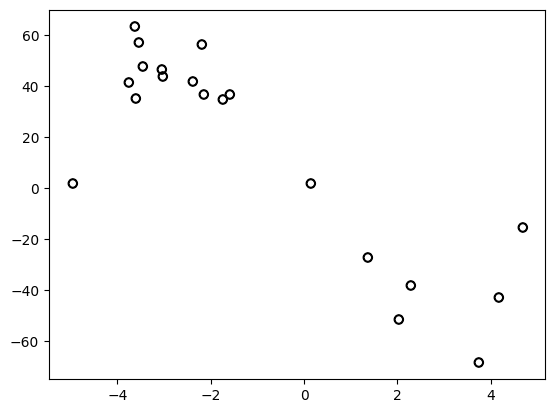

In [1216]:
x, t = create_toy_data(func, low=-5, high=5, size=20, sigma=8.)
plt.scatter(x, t, s=50, marker="$○$", alpha=1, color="black", label="observation")

In [1217]:
evidences = []
regressions = []
for i in range(8):
    features = PolynomialFeatures(degree=i)
    X = features.transform(x)
    regression = EvidenceApproximation(alpha=100., beta=100.)
    regression.fit(X, t)
    evidences.append(regression.evidence(X, t))
    regressions.append(regression)
degree = np.argmax(evidences)
regression = regressions[degree]

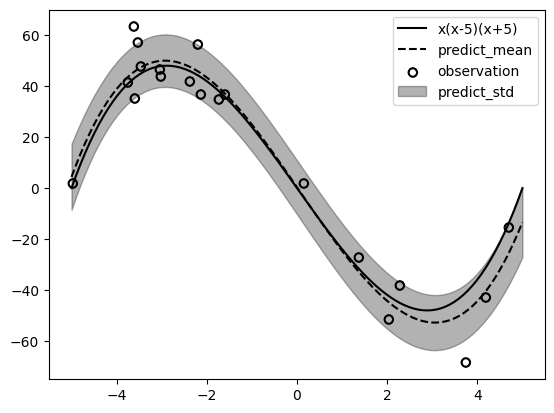

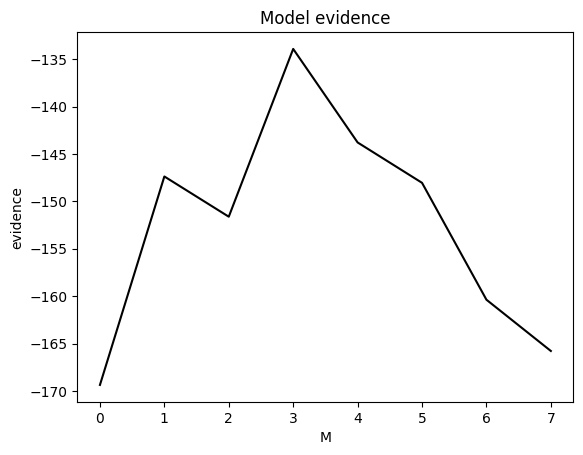

In [1218]:
x_test = np.linspace(-5, 5, 100)
X_test = PolynomialFeatures(degree=int(degree)).transform(x_test)
y, y_std = regression.predict_dist(X_test)

plt.plot(x_test, func(x_test), color="black", label="x(x-5)(x+5)")
plt.plot(x_test, y, color="black", label="predict_mean", linestyle="--")
plt.scatter(x, t, s=50, marker="$○$", alpha=1, color="black", label="observation")
plt.fill_between(x_test, y - y_std, y + y_std, color="black", alpha=0.3, label="predict_std")
plt.legend()
plt.show()

plt.plot(evidences, c="black")
plt.title("Model evidence")
plt.xlabel("M")
plt.ylabel("evidence")
plt.show()

In [1219]:
print(regression.alpha)
print(regression.beta)

0.0058356368067944385
0.010248686818244314
